In [1]:
# Import libraries
import os
import glob
import cv2
import numpy as np
from sklearn import preprocessing

In [2]:
# Kernel sharpening
sharpen_filter = np.array([
    [0,-1,0],
    [-1,5,-1],
    [0,-1,0]
])

## **Data Training Preprocessing - Resizing, Sharpening, and Normalization**

In [3]:
train_img = []
train_labels = []

In [4]:
for dir_path in glob.glob('Split500/train/*'):
  label = dir_path.split('\\')[-1]
  print(label)
  for img_path in glob.glob(os.path.join(dir_path, '*.jpg')):
    img = cv2.imread(img_path)
    # Resizing
    img_resized = cv2.resize(img, (312, 312))
    # Sharpening
    img_sharpened = cv2.filter2D(img_resized, -1, sharpen_filter)
    # Put the images and the labels into the lists
    train_img.append(img_sharpened)
    train_labels.append(label)

Aedes aegypti
Aedes albopictus
Culex quinquefasciatus


In [5]:
# change train_img[] into numpy array
train_img = np.array(train_img)
train_img.shape

(1248, 312, 312, 3)

In [6]:
# change train_labels[] into numpy array
train_labels = np.array(train_labels)
train_labels.shape

(1248,)

In [7]:
# Normalizing the train images set
train_img_normalized = train_img / 255.0

## **Data Testing Preprocessing - Resizing, Sharpening, and Normalization**

In [8]:
test_img = []
test_labels = []

In [9]:
for dir_path in glob.glob('Split500/test/*'):
  label_test = dir_path.split('\\')[-1]
  print(label_test)
  for img_path in glob.glob(os.path.join(dir_path, '*.jpg')):
    img = cv2.imread(img_path)
    # Resizing
    img_resized = cv2.resize(img, (312, 312))
    # Sharpening
    img_sharpened = cv2.filter2D(img_resized, -1, sharpen_filter)
    # Put the images and the labes into the lists
    test_img.append(img_sharpened)
    test_labels.append(label_test)

Aedes aegypti
Aedes albopictus
Culex quinquefasciatus


In [10]:
# change test_img[] into numpy array
test_img = np.array(test_img)
test_img.shape

(312, 312, 312, 3)

In [11]:
# change test_labels[] into numpy array
test_labels = np.array(test_labels)
test_labels.shape

(312,)

In [12]:
# Normalizing the test images set
test_img_normalized = test_img / 255.0

## **Changing the data labels into categorical**

In [13]:
le = preprocessing.LabelEncoder()

# The train set labels
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)
train_labels_encoded

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [14]:
# The test set labels
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
test_labels_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

## **Building the CNN's VGG16 model without top layers**

In [15]:
# Import libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D

In [16]:
FE_nonTop_model = Sequential()

FE_nonTop_model.add(Conv2D (input_shape=(312, 312, 3), filters=64, kernel_size=(3,3), padding='same', activation='relu'))
FE_nonTop_model.add(Conv2D (filters = 64, kernel_size=(3,3), padding="same", activation="relu"))
FE_nonTop_model.add(MaxPool2D (pool_size=(2,2), strides=(2,2)))

FE_nonTop_model.add(Conv2D (filters=128, kernel_size=(3,3), padding="same", activation="relu"))
FE_nonTop_model.add(Conv2D (filters=128, kernel_size=(3,3), padding="same", activation="relu"))
FE_nonTop_model.add(MaxPool2D (pool_size=(2,2), strides=(2,2)))

FE_nonTop_model.add(Conv2D (filters=256, kernel_size=(3,3), padding="same", activation="relu"))
FE_nonTop_model.add(Conv2D (filters=256, kernel_size=(3,3), padding="same", activation="relu"))
FE_nonTop_model.add(Conv2D (filters=256, kernel_size=(3,3), padding="same", activation="relu"))
FE_nonTop_model.add(MaxPool2D (pool_size=(2,2), strides=(2,2)))

FE_nonTop_model.add(Conv2D (filters=512, kernel_size=(3,3), padding="same", activation="relu"))
FE_nonTop_model.add(Conv2D (filters=512, kernel_size=(3,3), padding="same", activation="relu"))
FE_nonTop_model.add(Conv2D (filters=512, kernel_size=(3,3), padding="same", activation="relu"))
FE_nonTop_model.add(MaxPool2D (pool_size=(2,2),strides=(2,2)))

FE_nonTop_model.add(Conv2D (filters=512, kernel_size=(3,3), padding="same", activation="relu"))
FE_nonTop_model.add(Conv2D (filters=512, kernel_size=(3,3), padding="same", activation="relu"))
FE_nonTop_model.add(Conv2D (filters=512, kernel_size=(3,3), padding="same", activation="relu"))
FE_nonTop_model.add(MaxPool2D (pool_size=(2,2),strides=(2,2)))

FE_nonTop_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 312, 312, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 312, 312, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 156, 156, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 156, 156, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 156, 156, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 78, 78, 128)      0         
 2D)                                                    

In [17]:
# Freeze all the convolution layers
for layer in FE_nonTop_model.layers:
  layer.trainable = False

FE_nonTop_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 312, 312, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 312, 312, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 156, 156, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 156, 156, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 156, 156, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 78, 78, 128)      0         
 2D)                                                    

## **Building Random Forest Model**

In [18]:
# Import library
from sklearn.ensemble import RandomForestClassifier

In [19]:
# Building using the best hyperparameter that I got
RF_model = RandomForestClassifier(n_estimators = 450, min_samples_leaf = 6, max_depth = 50,
                                  bootstrap = False, random_state = 42)

## **Training Model**

In [20]:
%%time
# Feature extraction using VGG16
train_nonTop = FE_nonTop_model.predict(train_img_normalized)

39/39 [==============================] - 472s 12s/step
Wall time: 7min 53s


In [21]:
# Changing the feature into 1 dimension vector
train_nonTop_ft = train_nonTop.reshape(train_nonTop.shape[0], -1)

In [22]:
%%time
# Classify the feature using random forest
train_nonTop_predict = RF_model.fit(train_nonTop_ft, train_labels_encoded)

Wall time: 58.6 s


## **Testing Model**

In [23]:
%%time
# Feature extraction using VGG16
test_nonTop = FE_nonTop_model.predict(test_img_normalized)

10/10 [==============================] - 133s 14s/step
Wall time: 2min 13s


In [24]:
# Changing the feature into 1 dimension vector
test_nonTop_ft = test_nonTop.reshape(test_nonTop.shape[0], -1)

In [25]:
%%time
# Classify using random forest
test_nonTop_predict = RF_model.predict(test_nonTop_ft)

Wall time: 227 ms


## **Evaluating Model**

In [26]:
# Import libraries
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

In [27]:
# Count accuracy of the test result
print("Akurasi = ", metrics.accuracy_score(test_labels_encoded, test_nonTop_predict))

Akurasi =  0.9006410256410257


In [28]:
# Evaluation of model prediction
print(classification_report(test_nonTop_predict, test_labels_encoded))

              precision    recall  f1-score   support

           0       0.81      0.98      0.88        86
           1       0.89      0.92      0.91       101
           2       1.00      0.83      0.91       125

    accuracy                           0.90       312
   macro avg       0.90      0.91      0.90       312
weighted avg       0.91      0.90      0.90       312



array([[ 84,   8,  12],
       [  2,  93,   9],
       [  0,   0, 104]], dtype=int64)

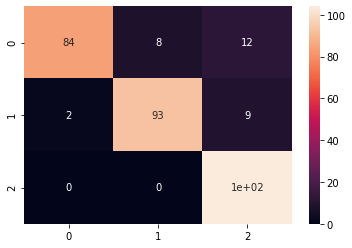

In [29]:
# Confusion Matrix

map_nonTop = confusion_matrix(test_labels_encoded, test_nonTop_predict)
sns.heatmap(map_nonTop, annot = True)
map_nonTop